## 클러스터링 분석
- 클러스터링 분석이란?
- 데이터간 유사도
- 주요 클러스터링 기법
- 클러스터간 거리 측정
-------------------------------------------------------------------------------

- 클러스터링 분석이란?
    - 주어진 데이터의 특성을 고려하여 데이터 군집을 형성하여 데이터를 분석하는 기법
    - 각 클러스터는 비슷한 특성을 가진 데이터를 포함함.  
    ![](./img/cluster_img.PNG)
    

- 데이터간 유사도 정의  
    - 데이터 간 거리(Distance metrics)가 데이터 간 유사도를 나타내는 척도로 널리 사용됨 
    <p float="center">
    <img src = "./img/cluster.PNG" width = "50%" height = "100%"/>
    <img src = "./img/cluster2.PNG" width = "50%" height = "100%"/>
    </p>
- 주요 클러스터링 기법
![](./img/cluster3.PNG)

--------------------------------------------------------------------------------
### - Partitioning approach : K-means Algorithm
- 알고리즘 설명  
: Partitioning 기반의 Clustering 알고리즘  
: 총 3단계로 구성되며 주로 마지막 두 단계가 반복 수행됨
: 알고리즘 과정  
    - Setp1. Centroids 초기화
    - Setp2. 오브젝트들을 가장 가까운 Centroid의 클러스터로 지정
    - Setp3. 각 클러스터의 새로운 Centroid를 계산
    - Setp4. Centroid가 수렴할 때까지 반복  
    
- 실습  
: LEGACY!!! 😡이므로 생략하도록 하겠음.(DBSCAN에 집중할 것)
--------------------------------------------------------------------------------


    
    


### - DBSCAN Algorithm (⭐과제 ⭐)
- 알고리즘 설명
- Scikit-learn을 활용한 실습
- 과제 소개  
--------------------------------------------------------------------------------

- 알고리즘 설명  
: Density 기반의 clustering 알고리즘
: 알고리즘을 설명하기위해 다음 5가지 용어를 정의함  
    - Core, Eps, Noise, MinPts, Border  
    ![](./img/cluster3.PNG)
    
    

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
col_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", 
"land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", 
"num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", 
"num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", 
"is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", 
"rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", 
"srv_diff_host_rate", "dst_host_count","dst_host_srv_count", "dst_host_same_srv_rate", 
"dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", 
"dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", 
"dst_host_srv_rerror_rate", "label"]

In [3]:
with open('./datasets/kddcupdata/kddcup.data_10_percent_corrected', 'r') as file:
    data = pd.read_csv(file, names=col_names)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [4]:
data['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [5]:
unique_labels = data['label'].unique()
unique_labels

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [6]:
selected_data = pd.DataFrame()
selected_data


""


In [7]:
selected_data = pd.concat([selected_data, data.loc[data['label'] == 'normal.'][:200]])
selected_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,tcp,http,SF,232,1721,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
196,0,tcp,http,SF,246,1718,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
197,0,tcp,http,SF,218,1484,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
198,0,tcp,http,SF,222,1651,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
for label in unique_labels:
    selected_data = pd.concat([selected_data, data.loc[data['label'] == label][:200]])
selected_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.00,0.00,0.11,0.0,0.0,0.00,0.00,0.00,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.00,0.00,0.05,0.0,0.0,0.00,0.00,0.00,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142477,0,tcp,ftp_data,SF,0,5636,0,0,0,0,...,41,1.00,0.00,1.00,0.1,0.0,0.00,0.00,0.00,rootkit.
148154,61,tcp,telnet,SF,294,3929,0,0,0,0,...,4,0.02,0.02,0.00,0.0,0.0,0.25,0.73,0.25,rootkit.
397011,0,udp,other,SF,32,0,0,0,0,0,...,1,0.00,0.02,0.00,0.0,0.0,0.00,0.00,0.00,rootkit.
452001,0,udp,other,SF,4,4,0,0,0,0,...,1,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.00,rootkit.


In [9]:
labels = selected_data['label'].to_numpy()  # 데이터와 레이블 분리(=copy와 유사)
labels

array(['normal.', 'normal.', 'normal.', ..., 'rootkit.', 'rootkit.',
       'rootkit.'], dtype=object)

In [10]:
data = selected_data.drop('label', axis=1)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,9,1.00,0.00,0.11,0.0,0.0,0.00,0.00,0.00
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,19,1.00,0.00,0.05,0.0,0.0,0.00,0.00,0.00
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,29,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,39,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,49,1.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142477,0,tcp,ftp_data,SF,0,5636,0,0,0,0,...,1,41,1.00,0.00,1.00,0.1,0.0,0.00,0.00,0.00
148154,61,tcp,telnet,SF,294,3929,0,0,0,0,...,255,4,0.02,0.02,0.00,0.0,0.0,0.25,0.73,0.25
397011,0,udp,other,SF,32,0,0,0,0,0,...,255,1,0.00,0.02,0.00,0.0,0.0,0.00,0.00,0.00
452001,0,udp,other,SF,4,4,0,0,0,0,...,1,1,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.00


In [11]:
data['protocol_type'], _ = data['protocol_type'].factorize()
data['service'], _ = data['service'].factorize()
data['flag'], _ = data['flag'].factorize()

data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,0,181,5450,0,0,0,0,...,9,9,1.00,0.00,0.11,0.0,0.0,0.00,0.00,0.00
1,0,0,0,0,239,486,0,0,0,0,...,19,19,1.00,0.00,0.05,0.0,0.0,0.00,0.00,0.00
2,0,0,0,0,235,1337,0,0,0,0,...,29,29,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
3,0,0,0,0,219,1337,0,0,0,0,...,39,39,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
4,0,0,0,0,217,2032,0,0,0,0,...,49,49,1.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142477,0,0,2,0,0,5636,0,0,0,0,...,1,41,1.00,0.00,1.00,0.1,0.0,0.00,0.00,0.00
148154,61,0,1,0,294,3929,0,0,0,0,...,255,4,0.02,0.02,0.00,0.0,0.0,0.25,0.73,0.25
397011,0,2,17,0,32,0,0,0,0,0,...,255,1,0.00,0.02,0.00,0.0,0.0,0.00,0.00,0.00
452001,0,2,17,0,4,4,0,0,0,0,...,1,1,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.00


In [12]:
scaler = MinMaxScaler()   # 일정하지 않은 데이터 개수를 조정해줌.
data = scaler.fit_transform(data)

In [13]:
data[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.61041764e-07, 1.05713002e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.37254902e-02, 1.37254902e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.14960630e-02,
       3.14960630e-02, 1.00000000e+00, 0.00000000e+00, 1.10000000e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [36]:
 data = PCA(n_components=3).fit_transform(data)

In [15]:
colors = [plt.cm.Spectral(e) for e in np.linspace(0, 1, len(unique_labels))]  # 색에 대한 레이블링 노가다 하기 싫어서 만든 코드

In [16]:
def gen_color_dict(_unique_labels, _colors):
    color_dict = dict()
    for i in range(len(_unique_labels)):
        color_dict[_unique_labels[i]] = _colors[i]
    return color_dict

In [17]:
gt_color_dict = gen_color_dict(unique_labels, colors)

In [18]:
gt_color_dict

{'normal.': (0.6196078431372549,
  0.00392156862745098,
  0.25882352941176473,
  1.0),
 'buffer_overflow.': (0.7126489811610919,
  0.10711264898116109,
  0.28081507112648985,
  1.0),
 'loadmodule.': (0.8141484044598232,
  0.2196847366397539,
  0.3048058439061899,
  1.0),
 'perl.': (0.8758169934640523, 0.3045751633986928, 0.29411764705882354, 1.0),
 'neptune.': (0.9330257593233372,
  0.3913110342176086,
  0.27197231833910035,
  1.0),
 'smurf.': (0.9665513264129182, 0.49742406766628217, 0.295040369088812, 1.0),
 'guess_passwd.': (0.9817762399077278,
  0.6073817762399076,
  0.3457900807381776,
  1.0),
 'pod.': (0.9928489042675894, 0.716955017301038, 0.40945790080738165, 1.0),
 'teardrop.': (0.9946943483275663,
  0.8092272202998846,
  0.48696655132641287,
  1.0),
 'portsweep.': (0.9963860053825452,
  0.8879661668589004,
  0.5610918877354863,
  1.0),
 'ipsweep.': (0.9982314494425221, 0.9451749327181853, 0.6570549788542868, 1.0),
 'land.': (0.998077662437524, 0.9992310649750096, 0.7460207612

In [19]:
colors = [plt.cm.Spectral(e) for e in np.linspace(0, 1, len(unique_labels))]

In [20]:
colors

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.7126489811610919, 0.10711264898116109, 0.28081507112648985, 1.0),
 (0.8141484044598232, 0.2196847366397539, 0.3048058439061899, 1.0),
 (0.8758169934640523, 0.3045751633986928, 0.29411764705882354, 1.0),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035, 1.0),
 (0.9665513264129182, 0.49742406766628217, 0.295040369088812, 1.0),
 (0.9817762399077278, 0.6073817762399076, 0.3457900807381776, 1.0),
 (0.9928489042675894, 0.716955017301038, 0.40945790080738165, 1.0),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287, 1.0),
 (0.9963860053825452, 0.8879661668589004, 0.5610918877354863, 1.0),
 (0.9982314494425221, 0.9451749327181853, 0.6570549788542868, 1.0),
 (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0),
 (0.9557862360630527, 0.9823144944252211, 0.6800461361014996, 1.0),
 (0.9096501345636295, 0.9638600538254518, 0.6080738177623992, 1.0),
 (0.8202998846597465, 0.9275663206459055, 

In [21]:
def gen_color_dict(_unique_labels, _colors):
    color_dict = dict()
    for i in range(len(_unique_labels)):
        color_dict[_unique_labels[i]] = _colors[i]
    return color_dict

In [22]:
gt_color_dict = gen_color_dict(unique_labels, colors)

In [23]:
gt_color_dict

{'normal.': (0.6196078431372549,
  0.00392156862745098,
  0.25882352941176473,
  1.0),
 'buffer_overflow.': (0.7126489811610919,
  0.10711264898116109,
  0.28081507112648985,
  1.0),
 'loadmodule.': (0.8141484044598232,
  0.2196847366397539,
  0.3048058439061899,
  1.0),
 'perl.': (0.8758169934640523, 0.3045751633986928, 0.29411764705882354, 1.0),
 'neptune.': (0.9330257593233372,
  0.3913110342176086,
  0.27197231833910035,
  1.0),
 'smurf.': (0.9665513264129182, 0.49742406766628217, 0.295040369088812, 1.0),
 'guess_passwd.': (0.9817762399077278,
  0.6073817762399076,
  0.3457900807381776,
  1.0),
 'pod.': (0.9928489042675894, 0.716955017301038, 0.40945790080738165, 1.0),
 'teardrop.': (0.9946943483275663,
  0.8092272202998846,
  0.48696655132641287,
  1.0),
 'portsweep.': (0.9963860053825452,
  0.8879661668589004,
  0.5610918877354863,
  1.0),
 'ipsweep.': (0.9982314494425221, 0.9451749327181853, 0.6570549788542868, 1.0),
 'land.': (0.998077662437524, 0.9992310649750096, 0.7460207612

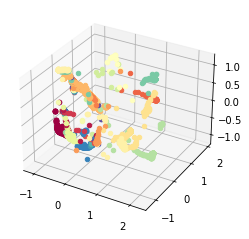

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(data)):
    ax.scatter(data[i][0], data[i][1], data[i][2], c=[gt_color_dict[labels[i]]])
plt.show()

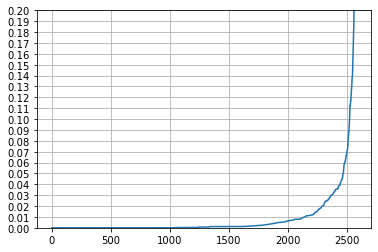

In [25]:
# (추가 코드) eps, minPts 찾기
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.yticks(np.arange(0,1,0.01))
plt.ylim(0,0.2)
plt.plot(distances)



In [32]:
dbscan = DBSCAN(eps=0.049, min_samples=1)
dbscan.fit(data)

DBSCAN(eps=0.049, min_samples=1)

In [33]:
dbscan_label = dbscan.labels_
dbscan_unique_labels = list(set(dbscan_label))
colors = [plt.cm.Spectral(e) for e in np.linspace(0, 1, len(dbscan_unique_labels))]
dbscan_color_dict = gen_color_dict(dbscan_unique_labels, colors)

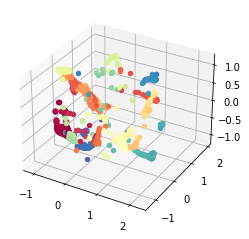

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(data)):
    ax.scatter(data[i][0], data[i][1], data[i][2], 
c=[dbscan_color_dict[dbscan_label[i]]])
plt.show()

In [34]:
n_clusters_ = len(set(dbscan_label)) - (1 if -1 in dbscan_label else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, dbscan_label))
print("Completeness: %0.3f" % metrics.completeness_score(labels, dbscan_label))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, dbscan_label))

Estimated number of clusters: 191
Homogeneity: 0.932
Completeness: 0.710
V-measure: 0.806
